In [1]:
# EXCEL TO CSV

from pandas.io.excel import ExcelWriter
import pandas

csv_files = ['../Desktop/cleaned_kickstarter_data/All.csv']

with ExcelWriter('../Desktop/cleaned_kickstarter_data/All.xlsx') as ew:
    for csv_file in csv_files:
        pandas.read_csv(csv_file).to_excel(ew)

In [6]:
# 3D GRAPH
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import glob
import collections
from collections import Counter
import time
from datetime import timedelta
import csv
import numpy as np
from collections import OrderedDict
from datetime import datetime
import statistics
from functools import reduce

path1 = "../Desktop/raw_kickstarter_data/"
path2 = "../Desktop/cleaned_kickstarter_data/"

count = 0
# import data
for foldername in glob.glob(path1 + "*"):
    print(foldername)
    frames = []
    for filename in glob.glob(foldername + "/*.csv"):
        if count == 0:
            df = pd.read_csv(filename)
            count += 1
        else:
            df = pd.read_csv(filename, header = 0)
        frames.append(df)
        
### INITIAL DATA CLEANING

projects_id = []
df1 = pd.DataFrame()
df1_success = pd.DataFrame()
df1_fail = pd.DataFrame()

df1 = pd.concat(frames, axis = 0, join = 'inner')

# remove unnecessary columns
to_drop = ['blurb','currency','currency_symbol','disable_communication','launched_at',
           'location','photo','pledged','profile','slug','spotlight','staff_pick',
           'state_changed_at','static_usd_rate']
df1.drop(to_drop, inplace=True, axis=1)

category_id1 = []
creator_id1 = []
category_name1 = []
url1 = []

# extract category id
for c1 in df1['category']:
    start_idx = c1.find('"id":') + 5
    end_idx1 = c1.find('"position":') - 1
    end_idx2 = c1.find('"name":') - 1
    end_idx = 0
    if (start_idx < end_idx1 and start_idx < end_idx2):
        end_idx = min(end_idx1, end_idx2)
    else:
        end_idx = max(end_idx1, end_idx2)
    category_id1.append(c1[start_idx:end_idx])

# extract creator id
for c2 in df1['creator']:
    start_idx = c2.find('"id":') + 5
    end_idx1 = c2.find('"avatar":') - 1
    end_idx2 = c2.find('"name":') - 1
    end_idx = 0
    if (start_idx < end_idx1 and start_idx < end_idx2):
        end_idx = min(end_idx1, end_idx2)
    else:
        end_idx = max(end_idx1, end_idx2)
    creator_id1.append(c2[start_idx:end_idx])

# extract category name
for c3 in df1['category']:
    start_idx = c3.find('"slug":') + 8
    end_idx = c3.find('"position":') - 2
    category_name1.append(c3[start_idx:end_idx])

# extract project url
for u1 in df1['urls']:
    start_idx = u1.find('"project":"') + 11
    end_idx = u1.find('"rewards":') - 2
    url1.append(u1[start_idx:end_idx])

# define new columns
df1['category_id'] = category_id1
df1['creator_id'] = creator_id1
df1['category_name'] = category_name1
df1['url'] = url1

# rearranging columns
df1 = df1[['creator_id','id','name','created_at','deadline','category_id','category_name',
           'goal','usd_pledged','backers_count','state','url', 'country']]

# convert epoch to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'],unit='s')
df1['deadline'] = pd.to_datetime(df1['deadline'],unit='s')

# only keep US companies that were not cancelled
df1 = df1.loc[(df1['country'] == 'US') & (df1['state'].isin(['successful','failed'])) & 
                  (df1['goal'] > 5000) & (df1['usd_pledged'] > 100)]
df1_success = df1.loc[(df1['country'] == 'US') & (df1['state'] == 'successful') & 
                      (df1['goal'] > 5000) & (df1['usd_pledged'] > 100)]
df1_fail = df1.loc[(df1['country'] == 'US') & (df1['state'] == 'failed') & 
                       (df1['goal'] > 5000)& (df1['usd_pledged'] > 100)]

df1.drop(['country'], inplace = True, axis = 1)
df1_success.drop(['country'], inplace = True, axis = 1)
df1_fail.drop(['country'], inplace = True, axis = 1)

# remove duplicates
df1 = df1.drop_duplicates('id')
projects_id = projects_id + list(df1['id'])
df1_success = df1_success.drop_duplicates('id')
df1_fail = df1_fail.drop_duplicates('id')


../Desktop/raw_kickstarter_data/2017-10
../Desktop/raw_kickstarter_data/2018-05
../Desktop/raw_kickstarter_data/2018-02
../Desktop/raw_kickstarter_data/2017-11
../Desktop/raw_kickstarter_data/2018-03
../Desktop/raw_kickstarter_data/2018-04
../Desktop/raw_kickstarter_data/2016-11
../Desktop/raw_kickstarter_data/2019-03
../Desktop/raw_kickstarter_data/2019-04
../Desktop/raw_kickstarter_data/2016-10
../Desktop/raw_kickstarter_data/2019-02
../Desktop/raw_kickstarter_data/2016-04
../Desktop/raw_kickstarter_data/2016-03
../Desktop/raw_kickstarter_data/2016-05
../Desktop/raw_kickstarter_data/2018-10
../Desktop/raw_kickstarter_data/2017-02
../Desktop/raw_kickstarter_data/2017-05
../Desktop/raw_kickstarter_data/2018-11
../Desktop/raw_kickstarter_data/2017-04
../Desktop/raw_kickstarter_data/2017-03
../Desktop/raw_kickstarter_data/2018-08
../Desktop/raw_kickstarter_data/2018-01
../Desktop/raw_kickstarter_data/2018-06
../Desktop/raw_kickstarter_data/2018-07
../Desktop/raw_kickstarter_data/2018-09


/Users/sarinaliu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
df2 = df1.copy()

df2['duration'] = (df2['deadline'] - df2['created_at']) / np.timedelta64(1,'M')
num_months = round(max(df2['duration']))

# dictionary for all projects duration
new_dict_duration = {}
for i in range(num_months): # set up blank dictionary
    new_dict_duration[i] = 0
for j in df2['duration']:
    if round(j) < num_months - 1: # round duration into number of months
        new_dict_duration[round(j)] += 1
    else:
        new_dict_duration[num_months - 1] += 1
        
# dictionary for all projects goal
new_dict_goal = {}

for j in df2['goal']:
    curr_key = int(round(j / 1000.0) * 1000.0)
    if curr_key in new_dict_goal.keys():
        new_dict_goal[curr_key] += 1
    else:
        new_dict_goal[curr_key] = 1

# dictionary for probability of success
new_dict_success_rate = {}

new_dict_success = {}
df2_success = df1_success.copy()
df2_success['duration'] = (df2_success['deadline'] - df2_success['created_at']) / np.timedelta64(1,'M')
for i in range(num_months):
    new_dict_success[i] = 0
for j in df2_success['duration']:
    if round(j) < num_months - 1:
        new_dict_success[round(j)] += 1
    else:
        new_dict_success[num_months - 1] += 1
        
for i in new_dict_duration.keys():
    if new_dict_duration[i] > 20: # sufficient number of projects with that duration
        new_dict_success_rate[i] = new_dict_success[i] / new_dict_duration[i]

5000
10000
15000
20000
25000
30000
35000
40000
45000


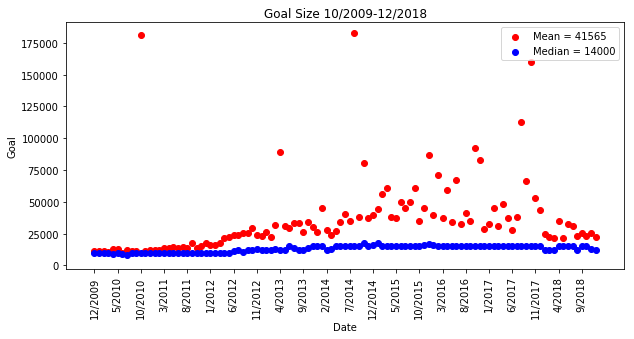

In [34]:
df4 = df1.copy()
df4['Month/Year'] = df4['deadline'].apply(lambda x: "%d/%d" % (x.month, x.year))

# dictionary of month/Year as key and goal size as value
new_dict = dict()
count = 0
for i in df4['Month/Year']:
    temp = df4.loc[df4['Month/Year'] == i]
    new_dict[i] = temp['goal']
    count += 1
    if count % 5000 == 0:
        print(count)
    
avg_dict = {} # average goal size
median_dict = {} # median goal size
for k,v in new_dict.items():
    avg = sum(v)/ len(v)
    if len(v) > 25: # significant enough number of projects
        avg_dict[k] = sum(v)/ len(v)
        median_dict[k] = statistics.median(v)

ordered_df4_1 = sorted(avg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False)
ordered_df4_2 = sorted(median_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False)

# PLOT GOAL SIZE

perc_diff = {}
fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.scatter(*zip(*ordered_df4_1), color = 'red')
plt.scatter(*zip(*ordered_df4_2), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::5], rotation = 'vertical') 
plt.xlabel('Date')
plt.ylabel('Goal')
mean1 = sum(df4['goal']) / len(df4['goal'])
med1 = statistics.median(df4['goal'])
plt.legend(['Mean = ' + str(round(mean1)), 
            'Median = ' + str(round(med1))])
plt.title('Goal Size 10/2009-12/2018')

perc_diff['Goal'] = (mean1 - med1) / ((mean1 + med1) / 2)

In [63]:
### DURATION VS GOAL SIZE

df2 = df1.copy()

df2['duration'] = (df2['deadline'] - df2['created_at']) / np.timedelta64(1,'M')

num_months = 30
count = 0

# dictionary for all_projects
new_dict_dg = {}
new_dict_dp = {}
for i in range(num_months): # set up blank dictionary
    new_dict_dg[i] = []
    new_dict_dp[i] = 0
for j in df2['duration']:
    temp = df2.loc[df2['duration'] == j]
    if round(j) < num_months - 1: # round duration into number of months
        temp_val = list(temp['goal'])
        new_dict_dg[round(j)].append(temp_val[0])
        new_dict_dp[round(j)] += 1
        
avg_dict_dg = {}
med_dict_dg = {}
for k,v in new_dict_dg.items():
    if v != [] and k > 0:
        avg_dict_dg[k] = sum(v) / len(v)
        med_dict_dg[k] = statistics.median(v)

# plt.scatter(list(avg_dict_dg.keys()),list(avg_dict_dg.values()), color = 'red')
# plt.xlabel('Goal Size')
# plt.ylabel('Duration')
# plt.title('Mean Goal Size vs. Duration')

# plt.scatter(list(med_dict_dg.keys()), list(med_dict_dg.values()), color = 'blue')
# plt.xlabel('Duration')
# plt.ylabel('Goal Size')
# plt.title('Median Goal Size vs. Duration')

In [67]:
### DURATION VS PLEDGED SIZE

df2 = df1.copy()

df2['duration'] = (df2['deadline'] - df2['created_at']) / np.timedelta64(1,'M')

num_months = 30
count = 0

# dictionary for all_projects
new_dict_dg = {}
new_dict_dp = {}
for i in range(num_months): # set up blank dictionary
    new_dict_dg[i] = []
    new_dict_dp[i] = 0
for j in df2['duration']:
    temp = df2.loc[df2['duration'] == j]
    if round(j) < num_months - 1: # round duration into number of months
        temp_val = list(temp['usd_pledged'])
        new_dict_dg[round(j)].append(temp_val[0])
        new_dict_dp[round(j)] += 1
        
avg_dict_dg = {}
med_dict_dg = {}
for k,v in new_dict_dg.items():
    if v != [] and k > 0:
        avg_dict_dg[k] = sum(v) / len(v)
        med_dict_dg[k] = statistics.median(v)

# plt.scatter(list(avg_dict_dg.keys()),list(avg_dict_dg.values()), color = 'red')
# plt.xlabel('Goal Size')
# plt.ylabel('Duration')
# plt.title('Mean Goal Size vs. Duration')

# plt.scatter(list(med_dict_dg.keys()), list(med_dict_dg.values()), color = 'blue')
# plt.xlabel('Duration')
# plt.ylabel('Goal Size')
# plt.title('Median Goal Size vs. Duration')

In [64]:
### DURATION VS GOAL SIZE

df2_success = df1_success.copy()

df2_success['duration'] = (df2_success['deadline'] - df2_success['created_at']) / np.timedelta64(1,'M')

num_months = 30

# dictionary for all_projects
new_dict_dg_success = {}
new_dict_dp_success = {}
for i in range(num_months): # set up blank dictionary
    new_dict_dg_success[i] = []
    new_dict_dp_success[i] = 0
for j in df2_success['duration']:
    temp = df2_success.loc[df2_success['duration'] == j]
    if round(j) < num_months - 1: # round duration into number of months
        temp_val = list(temp['goal'])
        new_dict_dg_success[round(j)].append(temp_val[0])
        new_dict_dp_success[round(j)] += 1
        
avg_dict_dg_success = {}
med_dict_dg_success = {}
for k,v in new_dict_dg_success.items():
    if v != [] and k > 0:
        avg_dict_dg_success[k] = sum(v) / len(v)
        med_dict_dg_success[k] = statistics.median(v)

# plt.scatter(avg_dict_dg_success.keys(),avg_dict_dg_success.values(), color = 'red')
# plt.scatter(med_dict_dg_success.keys(), med_dict_dg_success.values(), color = 'blue')
# plt.xlabel('Duration')
# plt.ylabel('Goal Size')
# plt.title('Mean vs. Median Goal Size vs. Duration for Successful Projects')

In [68]:
### DURATION VS PLEDGED SIZE

df2_success = df1_success.copy()

df2_success['duration'] = (df2_success['deadline'] - df2_success['created_at']) / np.timedelta64(1,'M')

num_months = 30

# dictionary for all_projects
new_dict_dg_success = {}
new_dict_dp_success = {}
for i in range(num_months): # set up blank dictionary
    new_dict_dg_success[i] = []
    new_dict_dp_success[i] = 0
for j in df2_success['duration']:
    temp = df2_success.loc[df2_success['duration'] == j]
    if round(j) < num_months - 1: # round duration into number of months
        temp_val = list(temp['usd_pledged'])
        new_dict_dg_success[round(j)].append(temp_val[0])
        new_dict_dp_success[round(j)] += 1
        
avg_dict_dg_success = {}
med_dict_dg_success = {}
for k,v in new_dict_dg_success.items():
    if v != [] and k > 0:
        avg_dict_dg_success[k] = sum(v) / len(v)
        med_dict_dg_success[k] = statistics.median(v)

# plt.scatter(avg_dict_dg_success.keys(),avg_dict_dg_success.values(), color = 'red')
# plt.scatter(med_dict_dg_success.keys(), med_dict_dg_success.values(), color = 'blue')
# plt.xlabel('Duration')
# plt.ylabel('Goal Size')
# plt.title('Mean vs. Median Goal Size vs. Duration for Successful Projects')

In [65]:
# dictionary for probability of success
new_dict_dp_success_rate = {}

for i in avg_dict_dg_success.keys():
    if new_dict_dp[i] > 0: # sufficient number of projects with that duration
        new_dict_dp_success_rate[i] = new_dict_dp_success[i] / new_dict_dp[i]
        
# plt.scatter(new_dict_dp_success_rate.keys(), new_dict_dp_success_rate.values())
# plt.xlabel('Duration')
# plt.ylabel('Probability of Success')
# plt.title('Probability of Success vs. Duration')

In [69]:
# dictionary for probability of success
new_dict_dp_success_rate = {}

for i in avg_dict_dg_success.keys():
    if new_dict_dp[i] > 0: # sufficient number of projects with that duration
        new_dict_dp_success_rate[i] = new_dict_dp_success[i] / new_dict_dp[i]
        
# plt.scatter(new_dict_dp_success_rate.keys(), new_dict_dp_success_rate.values())
# plt.xlabel('Duration')
# plt.ylabel('Probability of Success')
# plt.title('Probability of Success vs. Duration')

<IPython.core.display.Javascript object>


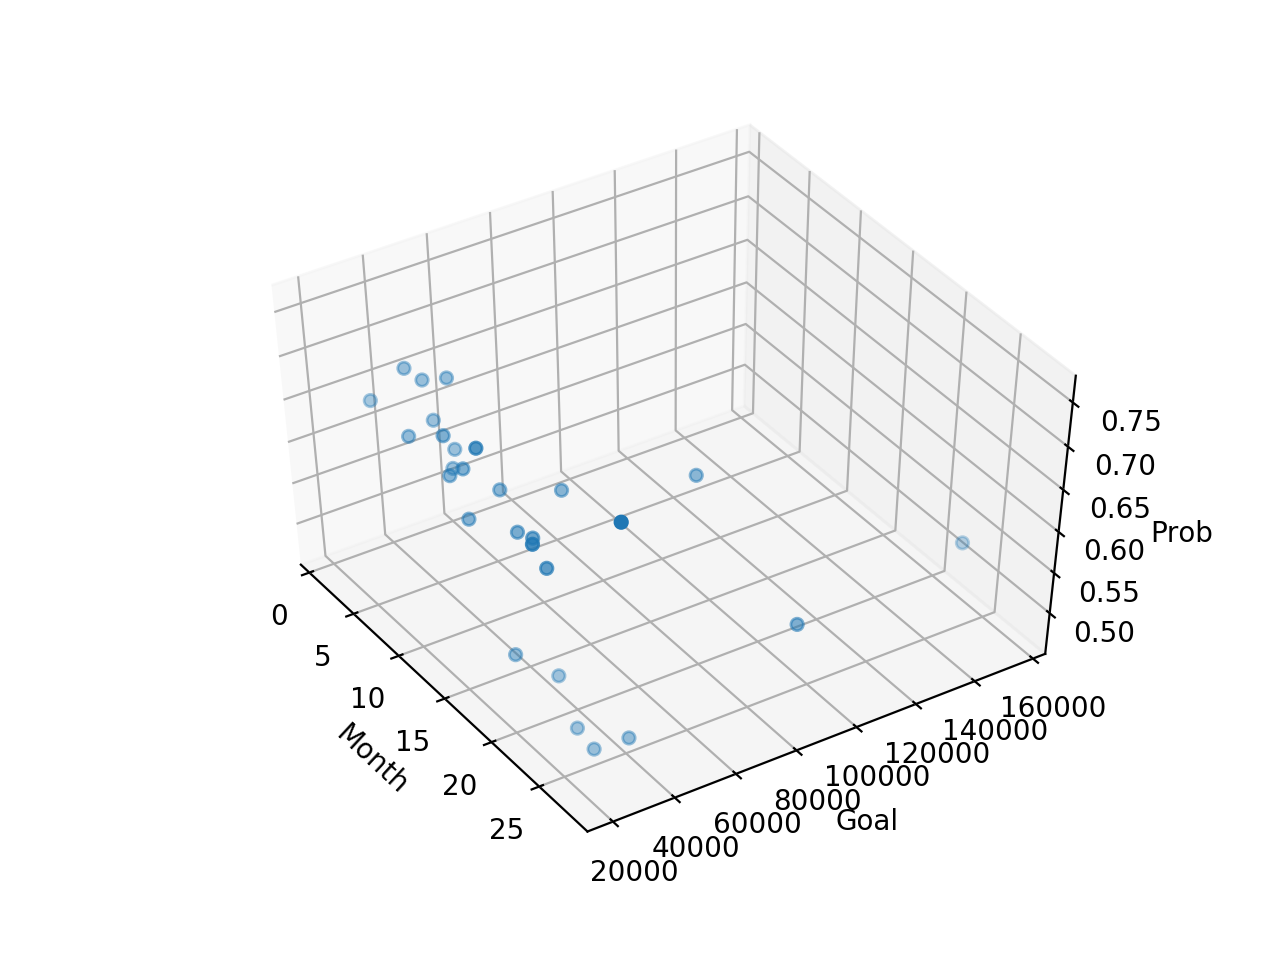

In [66]:
df3d_1 = pd.DataFrame(avg_dict_dg.items(), columns=['Month', 'Goal']) # 23
df3d_2= pd.DataFrame(new_dict_dp_success_rate.items(), columns=['Month', 'Prob']) # 23

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df3d_1['Month'], df3d_1['Goal'], df3d_2['Prob'])
threedee.set_xlabel('Month')
threedee.set_ylabel('Goal')
threedee.set_zlabel('Prob')
plt.show()

#%matplotlib notebook
#%matplotlib qt

<IPython.core.display.Javascript object>


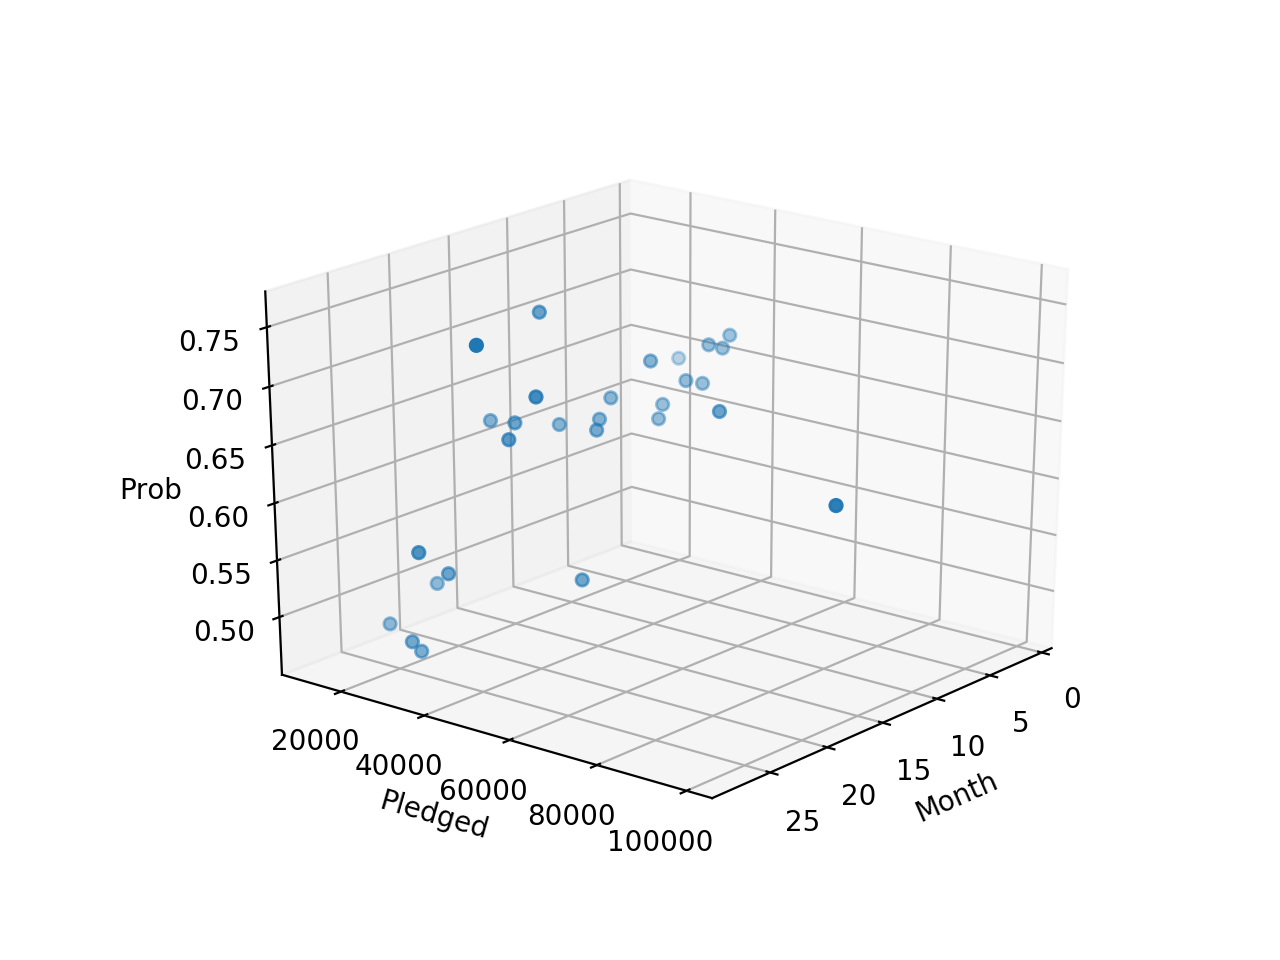

In [71]:
df3d_1 = pd.DataFrame(avg_dict_dg.items(), columns=['Month', 'Pledged']) # 23
df3d_2= pd.DataFrame(new_dict_dp_success_rate.items(), columns=['Month', 'Prob']) # 23

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df3d_1['Month'], df3d_1['Pledged'], df3d_2['Prob'])
threedee.set_xlabel('Month')
threedee.set_ylabel('Pledged')
threedee.set_zlabel('Prob')
plt.show()

#%matplotlib notebook
#%matplotlib qt